# Import Libraries:-

TensorFlow: Import TensorFlow library for building and training neural networks.
    
Matplotlib: Import Matplotlib library for visualization.
    
NumPy: Import NumPy library for numerical operations.

In [45]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Load Dataset:-

Load the MNIST dataset using TensorFlow's built-in dataset module keras.datasets.mnist.load_data().

The dataset consists of 60,000 training images and 10,000 testing images of handwritten digits (0-9).

In [46]:
(X_train,Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

In [47]:
len(X_train)

60000

In [48]:
len(X_test)

10000

In [49]:
X_train[0].shape

(28, 28)

# Data Preprocessing:-



Normalize pixel values of images by dividing them by 255. This scales the pixel values between 0 and 1.

In [50]:
X_train = X_train/255
X_test = X_test/255

In [51]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

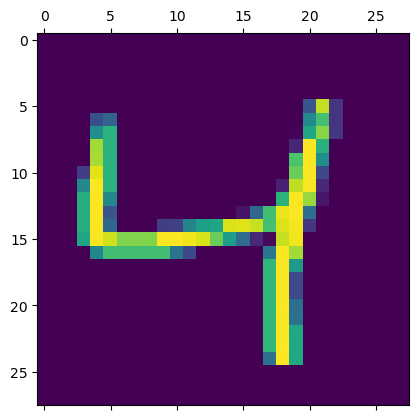

In [52]:
plt.matshow(X_train[2])

In [53]:
Y_train[2]

4

In [54]:
Y_train[:9]

array([5, 0, 4, 1, 9, 2, 1, 3, 1], dtype=uint8)

# Flatten Images:-



Flatten the 28x28 pixel images into 1D arrays of length 784 using NumPy's reshape() function.

In [55]:
X_train_Flatterned = X_train.reshape(len(X_train),28*28)

In [56]:
X_train_Flatterned

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
X_train_Flatterned.shape

(60000, 784)

In [58]:
X_test_Flatterned = X_test.reshape(len(X_test),28*28)

In [59]:
X_test_Flatterned

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [60]:
X_test_Flatterned.shape

(10000, 784)

In [61]:
X_train_Flatterned[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Build Neural Network:-



Create a sequential neural network model using Keras' Sequential API.

Add a single dense layer with 10 neurons (one for each digit) and a sigmoid activation function.

Compile the model with the Adam optimizer, sparse categorical crossentropy, loss function, and accuracy metric.

In [62]:
Neural_Network = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation = 'sigmoid')
])

Neural_Network.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics =['accuracy'])
Neural_Network.fit(X_train_Flatterned,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4673 - accuracy: 0.8766
Epoch 2/5
1875/1875 [==============================] - 2s 968us/step - loss: 0.3039 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 2s 946us/step - loss: 0.2833 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 2s 924us/step - loss: 0.2730 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 2s 976us/step - loss: 0.2665 - accuracy: 0.9257


# Evaluate Model:-



Evaluate the trained model's performance on the test data using the evaluate() method.

The model's accuracy on the test set is displayed.

In [63]:
Neural_Network.evaluate(X_test_Flatterned,Y_test)

313/313 [==============================] - 0s 910us/step - loss: 0.2651 - accuracy: 0.9267


[0.2651318907737732, 0.9266999959945679]

In [64]:
Neural_Network.predict(X_test_Flatterned)

313/313 [==============================] - 0s 824us/step


array([[1.62551031e-02, 3.71545383e-07, 5.73103428e-02, ...,
        9.99721110e-01, 1.07563891e-01, 6.57877564e-01],
       [4.61921632e-01, 6.45909738e-03, 9.99444127e-01, ...,
        1.19196981e-12, 1.85614169e-01, 3.14221871e-09],
       [4.91715560e-04, 9.93747115e-01, 7.03587115e-01, ...,
        1.43509313e-01, 3.93545747e-01, 4.25838381e-02],
       ...,
       [2.09408608e-06, 3.45072954e-06, 1.67276443e-03, ...,
        2.38222539e-01, 5.45232415e-01, 7.52978683e-01],
       [1.17761665e-04, 1.90269231e-04, 1.82732139e-04, ...,
        5.38946551e-05, 7.42916405e-01, 1.89382525e-04],
       [6.29702350e-03, 4.78542761e-10, 2.73323685e-01, ...,
        2.02959427e-08, 2.73297424e-04, 7.93645540e-07]], dtype=float32)

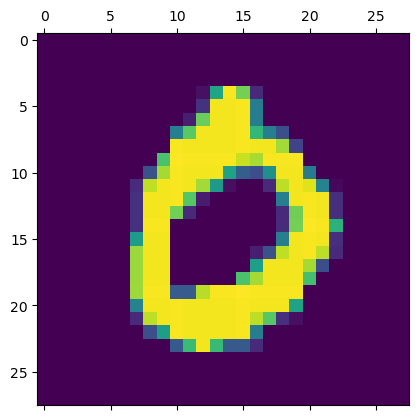

In [65]:
plt.matshow(X_test[3])

# Make Predictions:-



Use the trained model to make predictions on the test data using the predict() method.

The predicted labels for the test images are obtained.

In [66]:
Y_predict=Neural_Network.predict(X_test_Flatterned)

313/313 [==============================] - 0s 804us/step


In [67]:
Y_predict[3]

array([9.9913687e-01, 2.1544304e-08, 1.0458778e-01, 7.5180917e-03,
       1.0393020e-04, 1.1863804e-01, 9.1114745e-02, 1.5991010e-02,
       3.1739384e-02, 3.0204220e-02], dtype=float32)

In [68]:
np.argmax(Y_predict[3])

0

In [69]:
Y_predict

array([[1.62551031e-02, 3.71545383e-07, 5.73103428e-02, ...,
        9.99721110e-01, 1.07563891e-01, 6.57877564e-01],
       [4.61921632e-01, 6.45909738e-03, 9.99444127e-01, ...,
        1.19196981e-12, 1.85614169e-01, 3.14221871e-09],
       [4.91715560e-04, 9.93747115e-01, 7.03587115e-01, ...,
        1.43509313e-01, 3.93545747e-01, 4.25838381e-02],
       ...,
       [2.09408608e-06, 3.45072954e-06, 1.67276443e-03, ...,
        2.38222539e-01, 5.45232415e-01, 7.52978683e-01],
       [1.17761665e-04, 1.90269231e-04, 1.82732139e-04, ...,
        5.38946551e-05, 7.42916405e-01, 1.89382525e-04],
       [6.29702350e-03, 4.78542761e-10, 2.73323685e-01, ...,
        2.02959427e-08, 2.73297424e-04, 7.93645540e-07]], dtype=float32)

In [70]:
Y_predict_label = [np.argmax(i) for i in Y_predict]


In [71]:
Y_predict_label[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [72]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=Y_predict_label)

In [73]:
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    1,    2,    0,    6,    8,    3,    2,    1],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   3,    8,  934,   15,    9,    4,   10,    9,   36,    4],
       [   3,    0,   21,  916,    0,   27,    2,   10,   23,    8],
       [   1,    1,    6,    1,  921,    0,    7,    3,   10,   32],
       [   9,    3,    5,   29,   11,  777,   12,    7,   33,    6],
       [   9,    3,    8,    1,    8,   12,  911,    2,    4,    0],
       [   1,    5,   22,    9,    9,    0,    0,  942,    3,   37],
       [   5,    6,    6,   21,    9,   23,   10,   10,  877,    7],
       [   7,    6,    2,    9,   33,    7,    0,   18,    8,  919]])>

# Visualize Results:-



Visualize a sample test image and its corresponding predicted label using Matplotlib's matshow() function.

Display the confusion matrix to evaluate the model's performance on different classes.

In [74]:
import seaborn as sn

<Axes: >

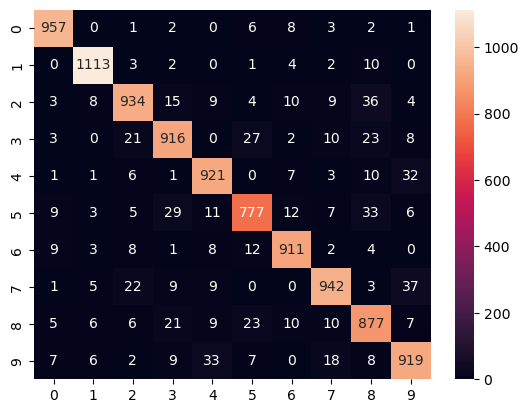

In [75]:
sn.heatmap(cm,annot=True,fmt='d')


# Improve Model:-



Improve the model by adding more layers in the hidden layer.

Train and evaluate the improved model.

In [76]:
Neural_Network = keras.Sequential([
    keras.layers.Dense(200,input_shape=(784,),activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

Neural_Network.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics =['accuracy'])
Neural_Network.fit(X_train_Flatterned,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2369 - accuracy: 0.9317
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1015 - accuracy: 0.9697
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0674 - accuracy: 0.9795
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0481 - accuracy: 0.9853
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0359 - accuracy: 0.9892


In [77]:
Neural_Network.evaluate(X_test_Flatterned,Y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0740 - accuracy: 0.9762


[0.0739714577794075, 0.9761999845504761]

In [78]:
Neural_Network.predict(X_test_Flatterned)
Y_predict=Neural_Network.predict(X_test_Flatterned)
np.argmax(Y_predict[3])
Y_predict_label = [np.argmax(i) for i in Y_predict]
cm = tf.math.confusion_matrix(labels=Y_test,predictions=Y_predict_label)

313/313 [==============================] - 0s 935us/step


<Axes: >

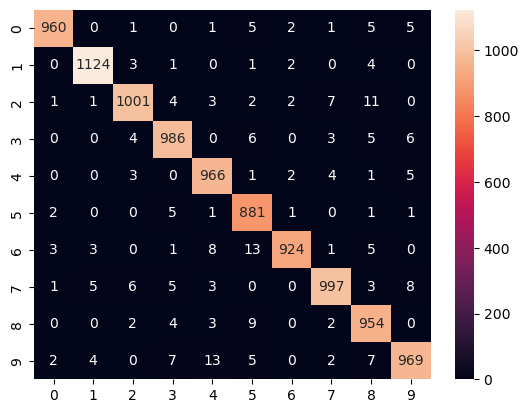

In [79]:
sn.heatmap(cm,annot=True,fmt='d')


# The accuracy of neural network models on the test dataset is 97